## 12.5 清除图像中的雾霾
	前面我们介绍了如何利用预训练模型提升性能和泛化能力，这节介绍如何利用一个预训练模型清除图像中的雾霾，使图像更清晰。
1）导入需要的模块。

In [1]:
import torch
import torch.nn as nn
import torchvision
import torch.backends.cudnn as cudnn
import torch.optim
import os
import numpy as np
from torchvision import transforms
from PIL import Image
import glob

In [2]:
#创建存放目标文件目录
path='clean_photo/results/test_images'
if not os.path.exists(path):
    os.makedirs(path)


In [3]:
#定义一个神经网络
class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()
        self.relu = nn.ReLU(inplace=True)
        
        self.e_conv1 = nn.Conv2d(3,3,1,1,0,bias=True)
        self.e_conv2 = nn.Conv2d(3,3,3,1,1,bias=True) 
        self.e_conv3 = nn.Conv2d(6,3,5,1,2,bias=True) 
        self.e_conv4 = nn.Conv2d(6,3,7,1,3,bias=True) 
        self.e_conv5 = nn.Conv2d(12,3,3,1,1,bias=True) 
        
    def forward(self, x):
        source = []
        source.append(x)
        
        x1 = self.relu(self.e_conv1(x))
        x2 = self.relu(self.e_conv2(x1))
        concat1 = torch.cat((x1,x2), 1)
        x3 = self.relu(self.e_conv3(concat1))
        
        concat2 = torch.cat((x2, x3), 1)
        x4 = self.relu(self.e_conv4(concat2))
        concat3 = torch.cat((x1,x2,x3,x4),1)
        x5 = self.relu(self.e_conv5(concat3))
        clean_image = self.relu((x5 * x) - x5 + 1)
        return clean_image

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = model().to(device)


def cl_image(image_path):
    data = Image.open(image_path)
    data = (np.asarray(data)/255.0)
    data = torch.from_numpy(data).float()
    data = data.permute(2,0,1)
    data = data.to(device).unsqueeze(0)    
    
    net.load_state_dict(torch.load('dehazer.pth'))

    clean_image = net.forward(data)
    torchvision.utils.save_image(torch.cat((data, clean_image),0), "clean_photo/results/" + image_path.split("/")[-1])


if __name__ == '__main__':
    test_list = glob.glob("./test_images/*.jpg")
    
    for image in test_list:
        cl_image(image)
        print(image, "done!")

./test_images\indoor.jpg done!
./test_images\NYU2_102_7_2.jpg done!
./test_images\NYU2_741_7_2.jpg done!
./test_images\shanghai01.jpg done!
./test_images\shanghai02.jpg done!
./test_images\shanghai03.jpg done!
./test_images\shanghai04.jpg done!
./test_images\test10.jpg done!
./test_images\test11.jpg done!
./test_images\test12.jpg done!
./test_images\test13.jpg done!
./test_images\test14.jpg done!
./test_images\test15.jpg done!
./test_images\test2.jpg done!
./test_images\test3.jpg done!
./test_images\test4.jpg done!
./test_images\test5.jpg done!
./test_images\test6.jpg done!
./test_images\test7.jpg done!
./test_images\test8.jpg done!
./test_images\test9.jpg done!


2）查看原来的图像。

<function matplotlib.pyplot.show(*args, **kw)>

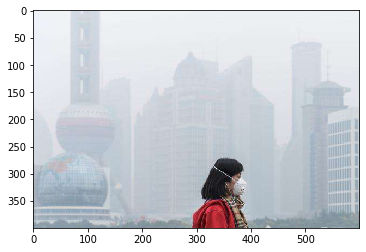

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img=imread('./test_images/shanghai02.jpg')
plt.imshow(img)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

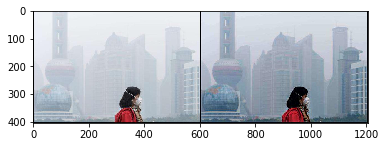

In [6]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img=imread('clean_photo/results/test_images/shanghai02.jpg')
plt.imshow(img)
plt.show